In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#Connect to Google Drive
from google.colab import drive 
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
#Read csv file of calories
calories = pd.read_csv("/content/drive/MyDrive/Final Dissertation Project/Calories Sheet - Data.csv")

In [6]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Exercise_Type,Calories
0,10001159,female,67,176,74,12,103,39.6,Cardio,76
1,10005485,female,38,178,77,14,82,40.5,Machine,49
2,10006441,male,23,169,73,25,102,40.7,Cardio,122
3,10007368,female,21,185,80,12,103,39.9,Machine,65
4,10008086,male,56,165,74,25,93,40.8,Cardio,129


In [7]:
#check rows and coloums
calories.shape

(4319, 10)

In [8]:
#more info about dataset
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_ID        4319 non-null   int64  
 1   Gender         4319 non-null   object 
 2   Age            4319 non-null   int64  
 3   Height         4319 non-null   int64  
 4   Weight         4319 non-null   int64  
 5   Duration       4319 non-null   int64  
 6   Heart_Rate     4319 non-null   int64  
 7   Body_Temp      4319 non-null   float64
 8   Exercise_Type  4319 non-null   object 
 9   Calories       4319 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 337.5+ KB


In [9]:
#check for null values
calories.isnull().sum()

User_ID          0
Gender           0
Age              0
Height           0
Weight           0
Duration         0
Heart_Rate       0
Body_Temp        0
Exercise_Type    0
Calories         0
dtype: int64

In [10]:
#convert gender into categorical data
#calories.replace({"Gender":{'male':0, 'female':1}}, inplace=True)

In [11]:
#convert gender into categorical data
#calories.replace({"Exercise_Type":{'Cardio':0, 'Machine':1}}, inplace=True)

In [12]:
calories['Gender'] = pd.factorize(calories.Gender)[0]
calories['Exercise_Type'] = pd.factorize(calories.Exercise_Type)[0]

In [13]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Exercise_Type,Calories
0,10001159,0,67,176,74,12,103,39.6,0,76
1,10005485,0,38,178,77,14,82,40.5,1,49
2,10006441,1,23,169,73,25,102,40.7,0,122
3,10007368,0,21,185,80,12,103,39.9,1,65
4,10008086,1,56,165,74,25,93,40.8,0,129


In [14]:
calories.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Exercise_Type,Calories
count,4.319000e+03,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000
mean,1.429595e+07,0.560083,42.669136,176.827043,77.376013,16.742996,96.468164,40.257837,0.499884,93.116925
std,2.598391e+06,0.496434,16.483814,12.516185,13.448229,5.933957,7.736953,0.393566,0.500058,51.320917
min,1.000116e+07,0.000000,21.000000,147.000000,56.000000,10.000000,77.000000,39.200000,0.000000,18.000000
25%,1.204210e+07,0.000000,28.000000,167.000000,66.000000,12.000000,91.000000,40.000000,0.000000,55.000000
50%,1.418591e+07,1.000000,39.000000,176.000000,77.000000,15.000000,96.000000,40.200000,0.000000,71.000000
75%,1.633527e+07,1.000000,55.000000,186.000000,88.000000,21.000000,102.000000,40.600000,1.000000,127.000000
max,1.999858e+07,1.000000,79.000000,213.000000,124.000000,30.000000,125.000000,41.500000,1.000000,314.000000


In [15]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_ID        4319 non-null   int64  
 1   Gender         4319 non-null   int64  
 2   Age            4319 non-null   int64  
 3   Height         4319 non-null   int64  
 4   Weight         4319 non-null   int64  
 5   Duration       4319 non-null   int64  
 6   Heart_Rate     4319 non-null   int64  
 7   Body_Temp      4319 non-null   float64
 8   Exercise_Type  4319 non-null   int64  
 9   Calories       4319 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 337.5 KB


In [16]:
# finding correlation
correlation = calories.corr()

<Axes: >

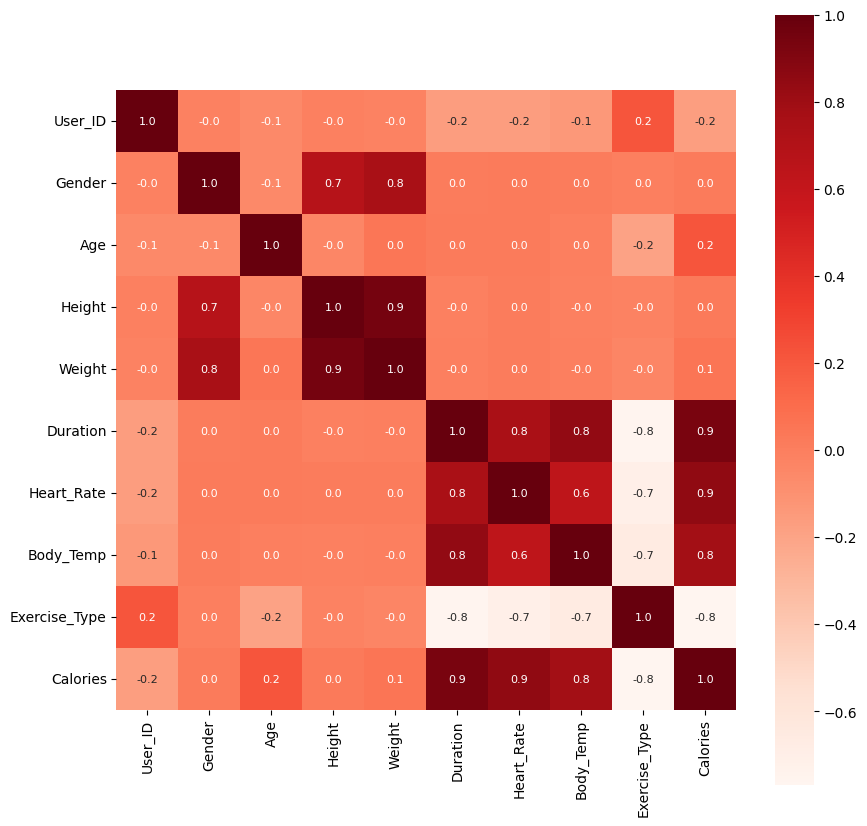

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap= 'Reds')

In [18]:
#seprating features and label
X = calories.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories['Calories']

In [19]:
print(X)

      Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0          0   67     176      74        12         103       39.6   
1          0   38     178      77        14          82       40.5   
2          1   23     169      73        25         102       40.7   
3          0   21     185      80        12         103       39.9   
4          1   56     165      74        25          93       40.8   
...      ...  ...     ...     ...       ...         ...        ...   
4314       0   32     150      57        19          96       40.3   
4315       0   36     170      65        12          93       40.1   
4316       1   36     205     112        22         107       40.9   
4317       1   38     164      73        14          91       40.1   
4318       1   22     185      80        27         112       40.7   

      Exercise_Type  
0                 0  
1                 1  
2                 0  
3                 1  
4                 0  
...             ...  
4314 

In [20]:
print(Y)

0        76
1        49
2       122
3        65
4       129
       ... 
4314     98
4315     58
4316    157
4317     55
4318    176
Name: Calories, Length: 4319, dtype: int64


In [21]:
#train and texting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3455, 8) (864, 8) (3455,) (864,)


In [23]:
#model training
model = RandomForestRegressor()
#(n_estimators = 1000 , max_features = 3 , max_depth = 6)

In [24]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
#prediction on test data
test_data_prediction = model.predict(X_test)

In [26]:
print(test_data_prediction)

[ 76.   121.79  89.11  37.59  65.69 206.56  55.39  55.24  50.16  78.55
  62.41 129.66  62.7  106.24 130.43  51.95 139.65  77.52  57.2   66.93
  51.94  52.18 178.78  48.91  73.83  82.98 121.51  62.79  61.02  51.46
  65.59  48.83 111.46  83.51  47.47 178.59  62.51  84.46 155.47  34.95
  58.98  82.1   52.71  60.58  92.4  134.6   75.99  48.73  49.21  94.46
  58.98  53.35  53.63  33.02  59.22  37.01  60.22 170.75  55.87  48.84
 156.82 115.08 226.95  61.73  76.15  81.46 156.89  88.87 129.42 133.5
  62.42  57.35  52.23 104.41 143.09  78.22 140.79  81.97 187.01  77.95
  53.59  50.27  38.66 171.12  34.17  61.5   87.61  64.28  65.97  62.17
  78.13  66.78  41.86  64.53  79.53  92.05 104.12 168.95  36.34  47.63
  76.93 170.57  57.32  46.13 124.55  92.41  45.67  79.57  72.81  88.43
  48.49 120.58  57.74  50.33 146.38  72.92 116.16  48.18 104.66 104.22
 104.    79.61  44.36  66.5  198.31  41.35  60.76 118.55  43.81  57.56
 123.51 104.91  63.79  55.02  51.67 123.74  77.14 132.33  65.9   44.5
  95.71 

In [27]:
#mean absolute error
mae= metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  2.907430555555555


In [29]:
import pickle
pickle.dump(model,open('/content/drive/MyDrive/Final Dissertation Project/Calories.pkl', 'wb'))